In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler  #will normalize the features i.e. each column of X, INDIVIDUALLY, so that each column/feature/variable will have μ=0 and σ=1
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer  #used to trasnform positive/negative sentiments as 0 and 1
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns   #used to plot the graphs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

In [6]:
df= pd.read_csv('IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
# Data Preprocessing
X = df['review']
y = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Logistic Regression for Sentiment Analysis with Scaled Data
# Convert text data to numerical features using CountVectorizer
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [5]:
# Scale the data
scaler = StandardScaler(with_mean=False)  # Sparse data, use with_mean=False
X_train_scaled = scaler.fit_transform(X_train_vec)
X_test_scaled = scaler.transform(X_test_vec)

In [6]:
# Train Logistic Regression model  //Kevin
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_logreg = logreg_model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
# Evaluate Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

Logistic Regression Accuracy: 0.8598


In [8]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))


Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.85      0.86      4961
    positive       0.86      0.87      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



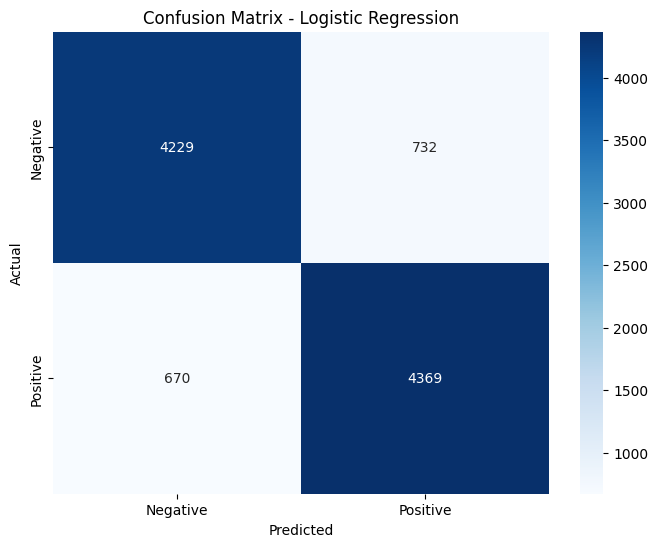

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))   #the width and height of the figure in inches
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Analyze Coefficients
coefficients = logreg_model.coef_[0]
feature_names = vectorizer.get_feature_names_out()

In [ ]:
# Identify Key Words or Phrases
feature_importance = list(zip(feature_names, coefficients))
feature_importance.sort(key=lambda x: x[1], reverse=True)
# Display Top N Key Words or Phrases
top_n = 10
print(f'Top {top_n} Key Words or Phrases for Positive Sentiment:')
print(feature_importance[:top_n])

print(f'\nTop {top_n} Key Words or Phrases for Negative Sentiment:')
print(feature_importance[:top_n])

Top 10 Key Words or Phrases for Positive Sentiment:
[('great', 0.6020675139901894), ('excellent', 0.42806804101539164), ('best', 0.4164456188073554), ('kung', 0.39408464330009857), ('felix', 0.36478692588932377), ('amazing', 0.33852529146522403), ('love', 0.3197118654863618), ('perfect', 0.31418379794253076), ('wonderful', 0.3112574488465427), ('brilliant', 0.31071549330230264)]

Top 10 Key Words or Phrases for Negative Sentiment:
[('disappointment', -0.3731398419695699), ('boll', -0.38242574381451966), ('poorly', -0.38805298713137987), ('mst3k', -0.40093451491022936), ('rourke', -0.41789437187179385), ('boring', -0.512314105592822), ('awful', -0.5300679342840449), ('bad', -0.648578895849789), ('waste', -0.6780418039026963), ('worst', -0.8113985388416655)]


In [9]:
# Convert sentiment labels to numerical values with label encoding
df['sentiment_numerical'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [11]:
X_vec = vectorizer.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_vec)

# Assign cluster labels to the original dataset
df['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


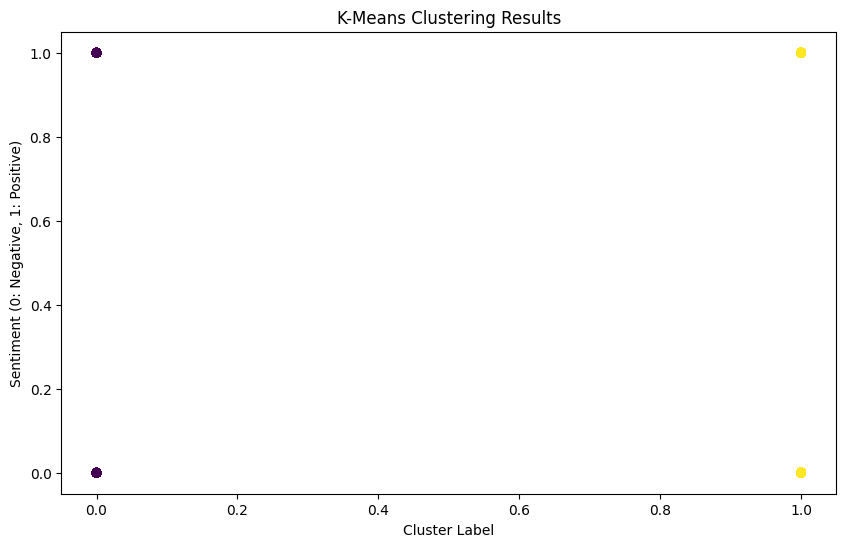

In [ ]:
# Visualize clustering results
plt.figure(figsize=(10, 6))
plt.scatter(df['cluster'], df['sentiment_numerical'], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering Results')
plt.xlabel('Cluster Label')
plt.ylabel('Sentiment (0: Negative, 1: Positive)')
plt.show()

In [ ]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_vec, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.248572258777101
Cluster Sentiment Mapping:
cluster
0    1
1    0
Name: sentiment_numerical, dtype: int64


In [ ]:
# Cluster Sizes
cluster_sizes = df['cluster'].value_counts()    #shows the number of positive and negative sentiments
print("Cluster Sizes:")
print(cluster_sizes)

Cluster Sizes:
0    38148
1    11852
Name: cluster, dtype: int64


<Figure size 1000x600 with 0 Axes>

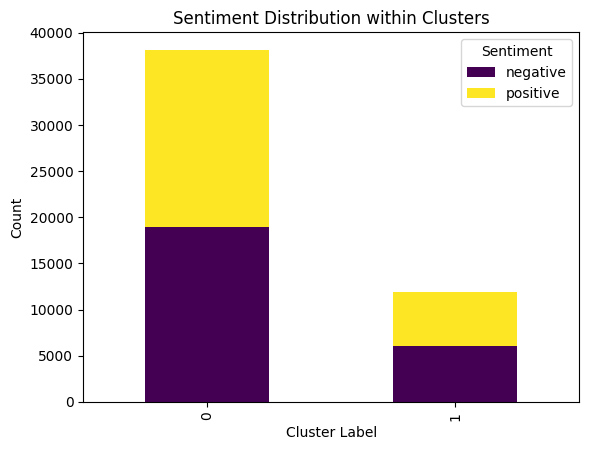

In [ ]:
# Assuming 'cluster' is the column with cluster labels and 'sentiment' is the true sentiment column
cluster_sentiment_counts = df.groupby(['cluster', 'sentiment']).size().unstack()

# Plot a stacked bar chart
plt.figure(figsize=(10, 6))
cluster_sentiment_counts.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Sentiment Distribution within Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

In [26]:
# Data Preprocessing
X = df['review']
y = df['sentiment']

# Vectorization
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X_vec = vectorizer.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Train KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=36)
knn_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate KNN classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 0.6702

Classification Report:
              precision    recall  f1-score   support

    negative       0.65      0.73      0.69      4961
    positive       0.70      0.61      0.65      5039

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000


Confusion Matrix:
[[3615 1346]
 [1952 3087]]


In [27]:
new_text = "This movie great!"

# Vectorize the new text
new_text_vec = vectorizer.transform([new_text])

# Find k-nearest neighbors
nearest_neighbors = knn_classifier.kneighbors(new_text_vec, n_neighbors=5)

# Access sentiment labels of nearest neighbors
nearest_neighbors_labels = y_train.iloc[nearest_neighbors[1][0]]
print("Sentiment Labels of Nearest Neighbors:", nearest_neighbors_labels)

Sentiment Labels of Nearest Neighbors: 19874    negative
27521    negative
31761    negative
13109    negative
24940    positive
Name: sentiment, dtype: object


In [ ]:
df = pd.read_csv('IMDB Dataset.csv')

# Data Preprocessing
X = df['review']
y = df['sentiment']

# Vectorization
vectorizer = CountVectorizer(max_features=500, stop_words='english')
X_vec = vectorizer.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Train SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate SVM classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8395

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.82      0.83      4961
    positive       0.83      0.86      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



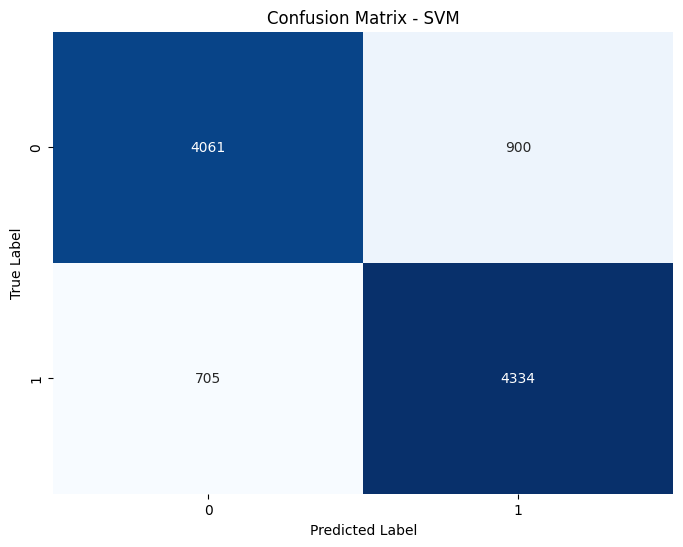

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Data Preprocessing
X = df['review']
y = df['sentiment']

# Vectorization
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X_vec = vectorizer.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Train Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred_nb = naive_bayes_classifier.predict(X_test)
# Evaluate Naive Bayes classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

Naive Bayes Accuracy: 0.8447


In [ ]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))


Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.85      0.84      4961
    positive       0.85      0.84      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



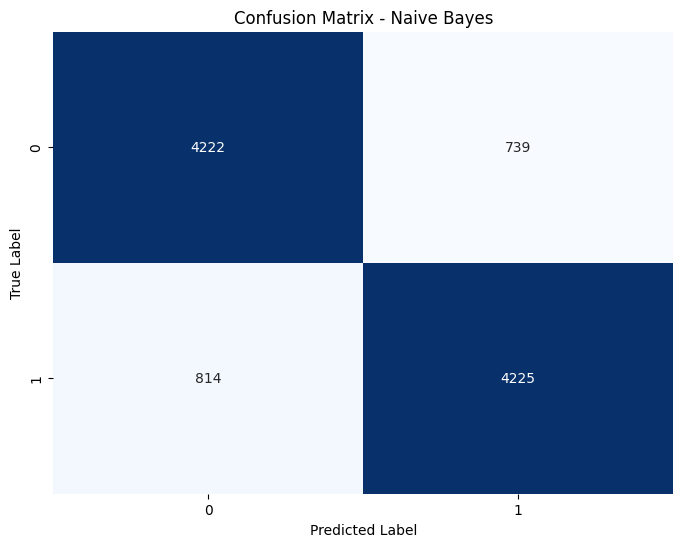

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

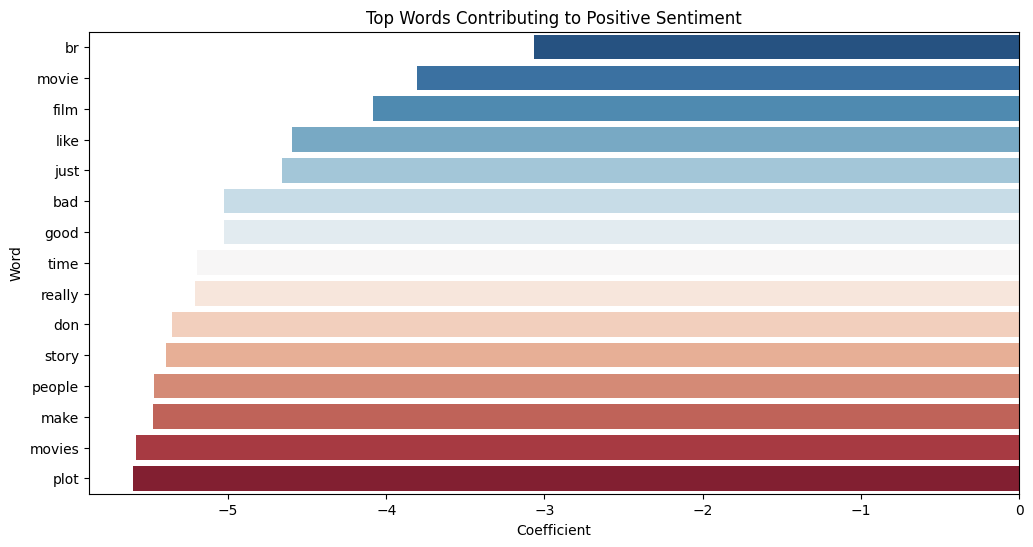

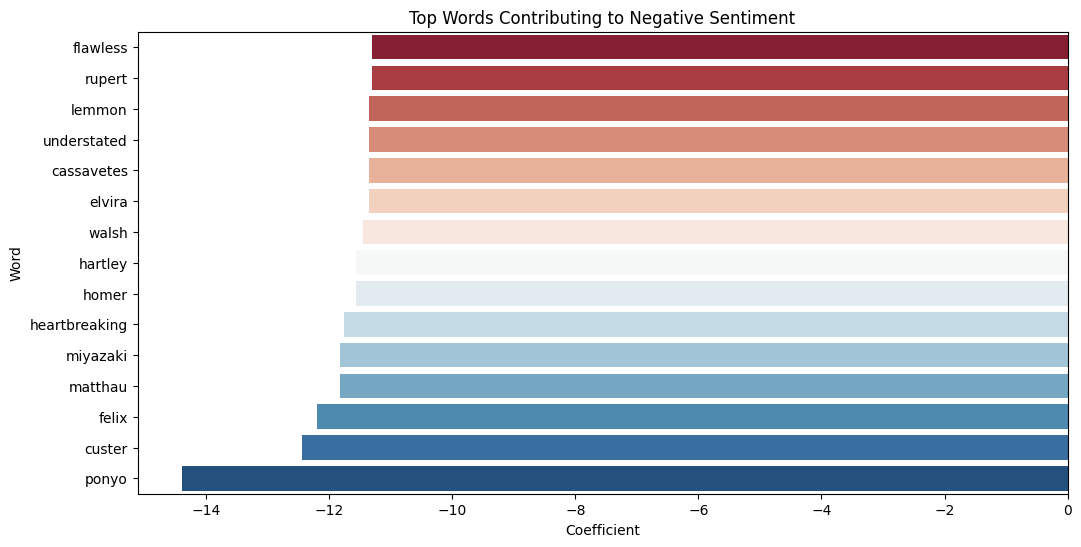

In [ ]:
# Assess factors contributing to sentiment likelihood
# Display the top words for positive and negative sentiments
feature_names = vectorizer.get_feature_names_out()
coefficients = naive_bayes_classifier.feature_log_prob_[0]

# Combine feature names and coefficients into a DataFrame
word_coefficient_df = pd.DataFrame({'Word': feature_names, 'Coefficient': coefficients})
word_coefficient_df = word_coefficient_df.sort_values(by='Coefficient', ascending=False)

# Visualize top words for positive and negative sentiments
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Word', data=word_coefficient_df.head(15), palette='RdBu_r')
plt.title('Top Words Contributing to Positive Sentiment')
plt.xlabel('Coefficient')
plt.ylabel('Word')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Word', data=word_coefficient_df.tail(15), palette='RdBu')
plt.title('Top Words Contributing to Negative Sentiment')
plt.xlabel('Coefficient')
plt.ylabel('Word')
plt.show()

Epoch 1/15
250/250 [==============================] - 162s 639ms/step - loss: 0.6895 - accuracy: 0.5273 - val_loss: 0.6716 - val_accuracy: 0.5540
Epoch 2/15
250/250 [==============================] - 156s 622ms/step - loss: 0.6148 - accuracy: 0.6600 - val_loss: 0.5389 - val_accuracy: 0.7607
Epoch 3/15
250/250 [==============================] - 155s 619ms/step - loss: 0.5164 - accuracy: 0.7648 - val_loss: 0.4962 - val_accuracy: 0.8052
Epoch 4/15
250/250 [==============================] - 155s 621ms/step - loss: 0.6049 - accuracy: 0.6819 - val_loss: 0.5834 - val_accuracy: 0.7021
Epoch 5/15
250/250 [==============================] - 156s 625ms/step - loss: 0.5004 - accuracy: 0.7909 - val_loss: 0.5454 - val_accuracy: 0.7784
Epoch 6/15
250/250 [==============================] - 158s 631ms/step - loss: 0.6061 - accuracy: 0.6323 - val_loss: 0.5549 - val_accuracy: 0.7735
Epoch 7/15
250/250 [==============================] - 155s 620ms/step - loss: 0.5225 - accuracy: 0.7494 - val_loss: 0.5951 -

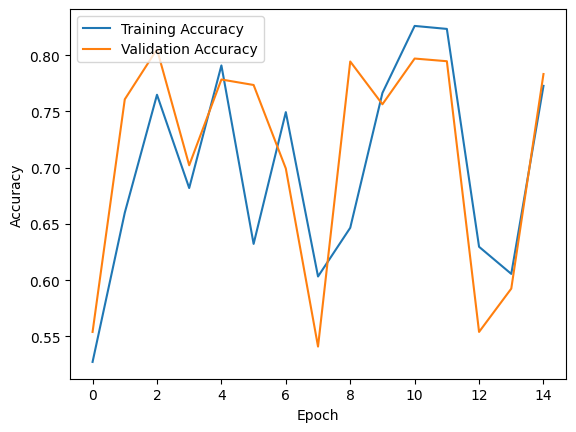

In [9]:
x = df['review'].values
y_str = df['sentiment'].values

# Convert string labels to numerical labels using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_str)

# Tokenize and pad sequences
max_len = 300
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000, oov_token='<OOV>')

tokenizer.fit_on_texts(x)
x_seq = tokenizer.texts_to_sequences(x)
x_padded = pad_sequences(x_seq, maxlen=max_len, padding='post')

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_padded, y, test_size=0.2, random_state=42)

# Build the model
model = models.Sequential()
model.add(layers.Embedding(input_dim=10000, output_dim=32, input_length=max_len))

model.add(layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=15, batch_size=128, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


313/313 [==============================] - 20s 63ms/step


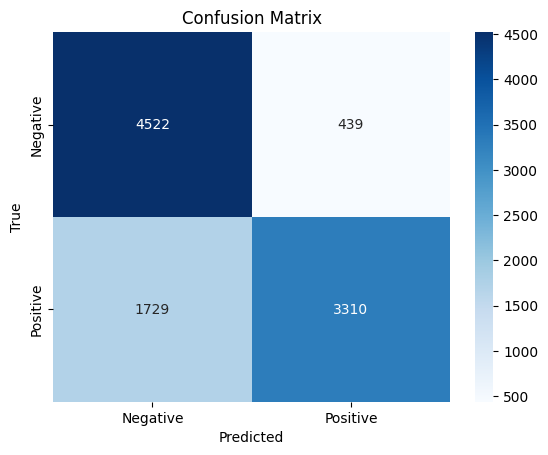

In [10]:
# Generate predictions
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype(int)
#Predicting the test set results: we want to make sure that it is true. If y_pred is larger than 0.5 it returns true, else false
# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()